# Logistic Regression

## Learning Objectives

By the end of this class, you should be able to...

1. Use a logistic regression classifier and understand its use cases
1. Compare and contrast logistic regression and SVM

## What is Logistic Regression?

- Logistic regression is another type of classifier, which **is different from linear regression** 
- Logistic regression predicts whether something is True or False, and the plot is an S-curve that goes from 0 to 1 (probability of False to True)
- How is it different from SVM?
    - SVM **can not** tell us what the _probability_ is of being classified in a given category 
    - For example, going back to the example we used in our SVM class, if my Serotonin is 3 and my Dopamine is 6, what is the chance that I would be considered happy? 90 percent? 60 percent? etc...
- Logistic Regression tell us this information!

## Logistic Regression Video

Before we start the video, here are some concepts that are mentioned in the video:

- R-Squared (R^2): is a number between 0 to 1, close to one means better model for linear regression (i.e. the closer to one, the better fit the line is)
- Multiple Regression: Regression model using 3+ variables

Let's watch this video: https://www.youtube.com/watch?v=yIYKR4sgzI8

### Optional Viewing
Here's the video on Maximum Likelihood that is mentioned in the above video: https://www.youtube.com/watch?v=XepXtl9YKwc

## The dataset we use for Logistic Regression

- Dataset we will use today: [diabetes.csv](./Datasets/diabetes.csv)
- The objective of the dataset is to **diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset**
- In particular, all patients here are females at least 21 years old of Pima Indian heritage
- Labels: 
    - 1: diabetes
    - 0: no diabetes

## Activity: Fit a Logistic Regression Classifier on diabetes.csv 
**In groups of 3, complete the following steps:**

1- Load the dataset: `pd.read_csv('diabetes.csv')`

2- Use these features: `feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']`

3- Split the data to train and test: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`

4- Obtain the statistics of `y_test`

**Hints:**

- make sure to have the following imports: 
```python
import pandas as pd
from sklearn.model_selection import train_test_split
```
- What's `sklearn.model_selection`? [read about it here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

pima = pd.read_csv('diabetes.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix, access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

## Activity: Check the size of y_train and show that it is 75% of the whole dataset

In [103]:
# check the size of y_train

print(len(y_train))
print(0.75*len(pima))

print(len(y_test))
print(0.25*len(pima))



576
576.0
192
192.0


## Activity: Build the classifier model with Logistic Regression and produce y_pred from X_test (features from test part)

**Hint:** read up on [sklearn's LogisticRegression module](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), specifically the `fit` and `predict` methods

In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
y_pred = logreg.predict(X_test)

print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


In [9]:
print(y_test.values.T)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


## Activity: How many samples in y_test have diabetes, and how many do not?

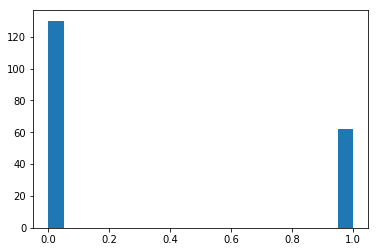

0    130
1     62
Name: Outcome, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# create and plot a histogram based on y_test
plt.hist(y_test, bins=20)
plt.show()

# count how many are 0 and 1 (no diabetes, has diabetes)
y_test_pd_series = pd.Series(y_test)
y_test_pd_series.value_counts()

# Intro to Confusion Matrix

A **confusion matrix** is a table that is used to describe the performance of a classifier on a set of test data where we know the true vales. Essentially, we use it to check how well our classifier's predicted values matched against the known values of the same data.

The confusion matrix itself is a simple 2x2 matrix, but it's important we go over the terminology of each row/column in the matrix:

**True Positives (TP):** we correctly predicted a positive outcome (i.e. someone has diabetes, and we correctly predicted it)

**True Negatives (TN):** we correctly predicted a negative outcome (i.e. someone does _not_ have diabetes, and we correctly predicted it)

**False Positives (FP):** we incorrectly predicted a positive outcome (i.e. someone does _not_ diabetes, and we incorrectly said that they did)

**False Negatives (FN):** we incorrectly predicted a negative outcome (i.e. someone has diabetes, and we incorrectly said that they do _not_)

![blank confusion matrix](./Images/blank_confusion_matrix.png)

## Activity: Write a function that calculates the confusion matrix for the Pima Diabetes dataset

- How many 0s (no diabetes) in y_test are predicted correctly as 0 (no diabetes) in y_pred?
    - True Positives

- How many 0s (no diabetes) in y_test are predicted incorrectly as 1 (diabetes) in y_pred?
    - False Positive

- How many 1s (diabetes) in y_test are predicted incorrectly as 0 (no diabetes) in y_pred?
    - False Negative

- How many 1s (diabetes) in y_test are predicted correctly 1 (diabetes) in y_pred?
    - True Negative


In [96]:
import numpy as np

def comp_yt_yp(y_test, y_predict):
    # create a blank 2x2 confusion matrix (all 0s)
    conf_matrix  = np.zeros((2, 2))
    # indices that will create all confusion matrix values
    # TP (1,1), TN (0,0), FP (0, 1), FN (1, 0)
    for row_index in [0, 1]:
        for column_index in [0, 1]:
            counter = 0
            # iterate through all elements of y_test, y_predict,
            # which are all values of either 0 or 1
            for (yt_index, yp_index) in zip(y_test, y_predict):
                # comparing the elements of y_test and y_predict with each confusion matrix value (TP, TN, FP, FN),
                # and if there's a match for the confusion matrix value we're looking at, increment the counter
                if (yt_index == row_index) & (yp_index == column_index):
                        counter += 1
            # Add the total number of elements for the confusion matrix value,
            # then look at the next value in the loop
            conf_matrix[row_index, column_index] = counter 
    return conf_matrix

# print the result of calculating our confusion matrix
print(comp_yt_yp(y_test, y_pred))

[[118.  12.]
 [ 47.  15.]]


## Revisit  Confusion Matrix Terminology 

**True Positives (TP):** we correctly predicted that they do have diabetes: 15

**True Negatives (TN):** we correctly predicted that they don't have diabetes: 118

**False Positives (FP):** we incorrectly predicted that they do have diabetes (_"Type I error"_): 12

**False Negatives (FN):** we incorrectly predicted that they don't have diabetes (_"Type II error"_): 47

<img src="Images/confusion_matrix.png" width="500" height="500">

## Easier way to compute elements of Confusion Matrix using sklearn

In [97]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[118  12]
 [ 47  15]]


## Activity: Apply these two methods to Pima Indian Diabetes dataset

After `logreg.fit(X_train, y_train)`, call the trained model using:
- `logreg.predict(X_test)`
- `logreg.predict_proba(X_test)`
    
Notice the difference in the results, and discuss it with your peers. What does each method do with the data?

## The difference between `.predict()` and `.predict_proba` for logistic reg classifier

- [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) will return a list of 0 and 1 values for a given sample
- [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) will return a list of lists where each element in the list is a probability estimate: the probability of the element being a 0 or 1

## Resources:

- https://www.ritchieng.com/machine-learning-evaluate-classification-model/